In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings("ignore")

In [2]:
retail = pd.read_csv('OnlineRetail.csv', encoding='unicode_escape')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### I. Reading and Understanding Data

In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
print('Phần trăm giá trị null của Description = ' + str(round(retail['Description'].isnull().sum() * 100 / retail.shape[0],2)) + '%')
print('Phần trăm giá trị null của CustomerID = ' + str(round(retail['CustomerID'].isnull().sum() * 100 / retail.shape[0],2)) + '%')

Phần trăm giá trị null của Description = 0.27%
Phần trăm giá trị null của CustomerID = 24.93%


### Check for anomalies of data

In [6]:
retail.query('UnitPrice < 0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [7]:
retail.query('Quantity < 0').head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [8]:
retail_ID_C = retail[retail['InvoiceNo'].astype(str).str.contains('C')]
retail_ID_C.shape

(9288, 8)

In [9]:
retail[retail['CustomerID'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [13]:
retail = retail[retail.Country == 'United Kingdom'].reset_index(drop=False)

In [14]:
retail = retail[retail.Country == 'United Kingdom']
retail.Country.unique()

array(['United Kingdom'], dtype=object)

### II. Data Preprocessing 

##### 1. Marketing

In [15]:
retail_df = retail[retail['UnitPrice'] > 0]
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df.shape

(485123, 10)

In [16]:
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485123 entries, 0 to 495477
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   level_0      485123 non-null  int64         
 1   index        485123 non-null  int64         
 2   InvoiceNo    485123 non-null  object        
 3   StockCode    485123 non-null  object        
 4   Description  485123 non-null  object        
 5   Quantity     485123 non-null  int64         
 6   InvoiceDate  485123 non-null  datetime64[ns]
 7   UnitPrice    485123 non-null  float64       
 8   CustomerID   354321 non-null  float64       
 9   Country      485123 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 40.7+ MB


In [17]:
retail_df["CustomerID"].fillna('No CustomerID', inplace = True)

In [18]:
retail_df.iloc[1443]

level_0                       1456
index                         1601
InvoiceNo                   536544
StockCode                    22545
Description    MINI JIGSAW BUNNIES
Quantity                         1
InvoiceDate    2010-12-01 14:32:00
UnitPrice                     0.85
CustomerID           No CustomerID
Country             United Kingdom
Name: 1456, dtype: object

In [19]:
retail_df['CustomerID'] = retail_df['CustomerID'].astype(str)
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485123 entries, 0 to 495477
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   level_0      485123 non-null  int64         
 1   index        485123 non-null  int64         
 2   InvoiceNo    485123 non-null  object        
 3   StockCode    485123 non-null  object        
 4   Description  485123 non-null  object        
 5   Quantity     485123 non-null  int64         
 6   InvoiceDate  485123 non-null  datetime64[ns]
 7   UnitPrice    485123 non-null  float64       
 8   CustomerID   485123 non-null  object        
 9   Country      485123 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 40.7+ MB


### III. Data Preparation (Insight Marketing)

In [20]:
retail_df['Revenue'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df.head()

,level_0,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [21]:
print('Phần trăm số đơn hàng bị hủy trong tập dữ liệu là:', round(retail_ID_C['InvoiceNo'].nunique() / retail['InvoiceNo'].nunique() * 100, 2), '%')
# Không lấy từng row vì 1 mỗi món hàng trong đơn hàng cũng tạo thành 1 dòng
print('Phần trăm số dòng bị hủy trong tập dữ liệu là:', round(retail_ID_C.shape[0] * 100 / retail.shape[0], 2), '%')
# --> Từ số liệu thống kê ra được hầu hết các đơn bị hủy đều có số lượng hàng hóa mua không lớn? ....

Phần trăm số đơn hàng bị hủy trong tập dữ liệu là: 16.33 %
Phần trăm số dòng bị hủy trong tập dữ liệu là: 1.87 %


### IV. RFM 

##### a. Recency

In [22]:
print('Min Date: ', retail_df['InvoiceDate'].min())
print('Max Date: ', retail_df['InvoiceDate'].max())

Min Date:  2010-12-01 08:26:00
Max Date:  2011-12-09 12:49:00


In [23]:
import datetime as dt
recency_df = (dt.datetime(2011, 12, 9, 12, 50, 0) - retail_df.groupby('CustomerID').agg({'InvoiceDate' : 'max'}).
             rename(columns = {'InvoiceDate' : 'Recency'}))
recency_df['Recency'] = recency_df['Recency'].apply(lambda x : x.days)
recency_df.reset_index()
recency_df = recency_df[:-1] # bỏ CustomerID == 'No CustomerID'
recency_df.tail()

,Recency
CustomerID,
18280.0,277
18281.0,180
18282.0,7
18283.0,3
18287.0,42


##### b. Frequency

In [24]:
frequency_df = retail_df.groupby('CustomerID')['InvoiceDate'].nunique() # vì mỗi món hàng là 1 row nên không thể count mà phải dùng nunique
frequency_df = frequency_df[:-1]
frequency_df.tail()

CustomerID
18280.0     1
18281.0     1
18282.0     2
18283.0    16
18287.0     3
Name: InvoiceDate, dtype: int64

##### c. Monetary 

In [25]:
monetary_df = retail_df.groupby('CustomerID')['Revenue'].sum()
monetary_df = monetary_df[:-1]
monetary_df.head()

CustomerID
12346.0    77183.60
12747.0     4196.01
12748.0    33719.73
12749.0     4090.88
12820.0      942.34
Name: Revenue, dtype: float64

##### d.RFM 

In [26]:
rfm = pd.concat([recency_df, frequency_df, monetary_df], axis = 1).reset_index()
rfm.rename(columns = {'InvoiceDate' : 'Frequency', 'Revenue' : 'Monetary'}, inplace = True)
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,1,11,4196.01
2,12748.0,0,210,33719.73
3,12749.0,3,5,4090.88
4,12820.0,2,4,942.34


##### e. Create Score RFM 

In [27]:
# Sử dụng phương pháp định lượng để tính điểm cho từng nhân tố RFM
rfm['RecencyScore'] = pd.qcut(rfm['Recency'], 5, labels = [5, 4, 3, 2, 1])
rfm['FrequencyScore'] = pd.qcut(rfm['Frequency'].rank(method = 'first'), 5, labels = [1, 2, 3, 4, 5])  # drop duplicates
rfm['MonetaryScore'] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])
rfm.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
0,12346.0,325,1,77183.60,1,1,5
1,12747.0,1,11,4196.01,5,5,5
2,12748.0,0,210,33719.73,5,5,5
3,12749.0,3,5,4090.88,5,4,5
4,12820.0,2,4,942.34,5,4,4


In [28]:
rfm['RFM'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM
0,12346.0,325,1,77183.60,1,1,5,115
1,12747.0,1,11,4196.01,5,5,5,555
2,12748.0,0,210,33719.73,5,5,5,555
3,12749.0,3,5,4090.88,5,4,5,545
4,12820.0,2,4,942.34,5,4,4,544


In [29]:
country = retail_df.groupby('CustomerID')['Country'].unique().astype(str)[:-1].reset_index()
for c in range(len(country)):
    country.loc[c, 'Country'] = country.loc[c, 'Country'][2:-2]
rfm = pd.merge(rfm, country, on = 'CustomerID')
rfm.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM,Country
0,12346.0,325,1,77183.60,1,1,5,115,United Kingdom
1,12747.0,1,11,4196.01,5,5,5,555,United Kingdom
2,12748.0,0,210,33719.73,5,5,5,555,United Kingdom
3,12749.0,3,5,4090.88,5,4,5,545,United Kingdom
4,12820.0,2,4,942.34,5,4,4,544,United Kingdom


##### f. Segmentation  

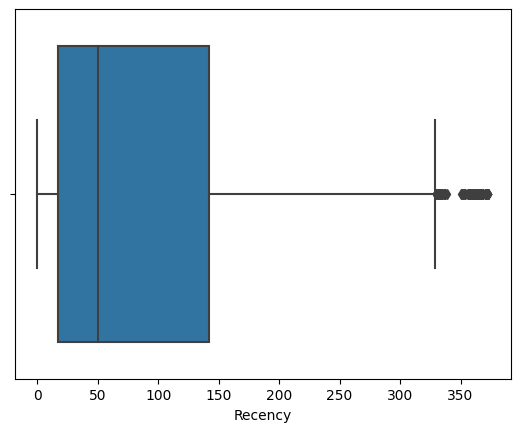

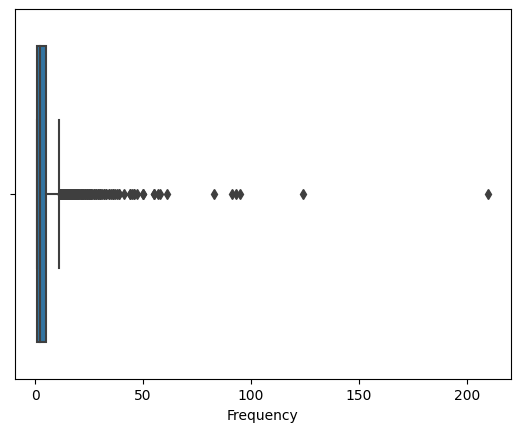

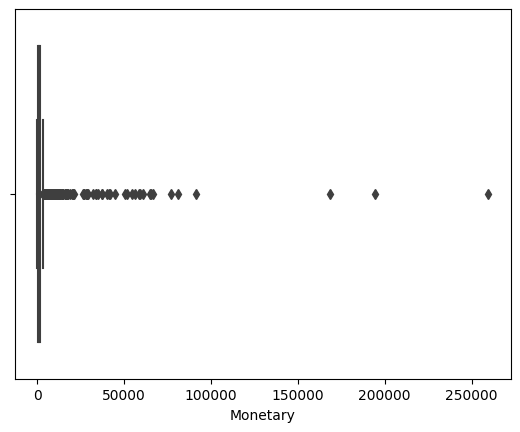

In [30]:
att = ['Recency', 'Frequency', 'Monetary']
for i in att: 
    sns.boxplot(x = rfm[i])
    plt.show()

In [31]:
rfm.shape

(3920, 9)

In [32]:
seg_map = {
    r'2[1-2]': 'Hibernating', r'12': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'11': 'Lost',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'}
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex = True)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM,Country,Segment
0,12346.0,325,1,77183.60,1,1,5,115,United Kingdom,Lost
1,12747.0,1,11,4196.01,5,5,5,555,United Kingdom,Champions
2,12748.0,0,210,33719.73,5,5,5,555,United Kingdom,Champions
3,12749.0,3,5,4090.88,5,4,5,545,United Kingdom,Champions
4,12820.0,2,4,942.34,5,4,4,544,United Kingdom,Champions


In [33]:
rfm_des = rfm[['Segment', 'Recency', 'Frequency', 'Monetary']].groupby('Segment').agg(['mean', 'median', 'count', 'std'])
rfm_des

Recency                          Frequency         \
                           mean median count        std       mean median   
Segment                                                                     
About to Sleep        52.104430   52.0   316  10.658264   1.170886    1.0   
At Risk              152.378731  136.5   536  68.949800   2.876866    3.0   
Can't Loose          129.539683  103.0    63  66.042710   8.396825    7.0   
Champions              4.914931    4.0   576   3.718071  12.152778    8.0   
Hibernating          183.511700  164.0   641  90.034873   1.146646    1.0   
Lost                 276.701538  272.0   325  55.374373   1.000000    1.0   
Loyal Customers       32.159122   28.0   729  15.521765   6.378601    5.0   
Need Attention        50.541401   50.0   157  10.688773   2.337580    2.0   
New Customers          6.297297    7.0    37   3.814190   1.000000    1.0   
Potential Loyalists   16.059867   17.0   451   9.553752   2.024390    2.0   
Promising             22.561798   23.0    89   5.493705   1.000000    1.0   

                                         Monetary                  \
                    count        std         mean    median count   
Segment                                                             
About to Sleep        316   0.377006   434.507089   325.355   316   
At Risk               536   0.939152  1055.673789   672.530   536   
Can't Loose            63   4.148609  2788.583492  2225.970    63   
Champions             576  14.711401  6148.158594  2572.575   576   
Hibernating           641   0.354029   386.032390   298.890   641   
Lost                  325   0.000000   533.590154   229.590   325   
Loyal Customers       729   4.496260  2505.112649  1647.260   729   
Need Attention        157   0.474398   834.020955   631.570   157   
New Customers          37   0.000000   383.817568   248.080    37   
Potential Loyalists   451   0.654441  1047.804612   503.760   451   
Promising              89   0.000000   263.291573   209.490    89   

                                   
                              std  
Segment                            
About to Sleep         386.526069  
At Risk               2639.919196  
Can't Loose           2100.601426  
Champions            16349.275338  
Hibernating            389.970788  
Lost                  4273.869807  
Loyal Customers       4147.170638  
Need Attention         750.422283  
New Customers          601.030058  
Potential Loyalists   7940.920348  
Promising              169.665607

            Recency  Frequency  Monetary
Recency    1.000000  -0.274225 -0.129355
Frequency -0.274225   1.000000  0.502652
Monetary  -0.129355   0.502652  1.000000


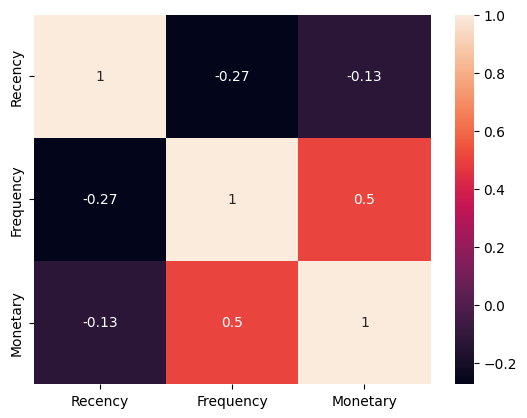

In [34]:
rfm_corr = rfm[['Recency', 'Frequency', 'Monetary']]
print(rfm_corr.corr())
sns.heatmap(rfm_corr.corr(), annot = True)
plt.show()

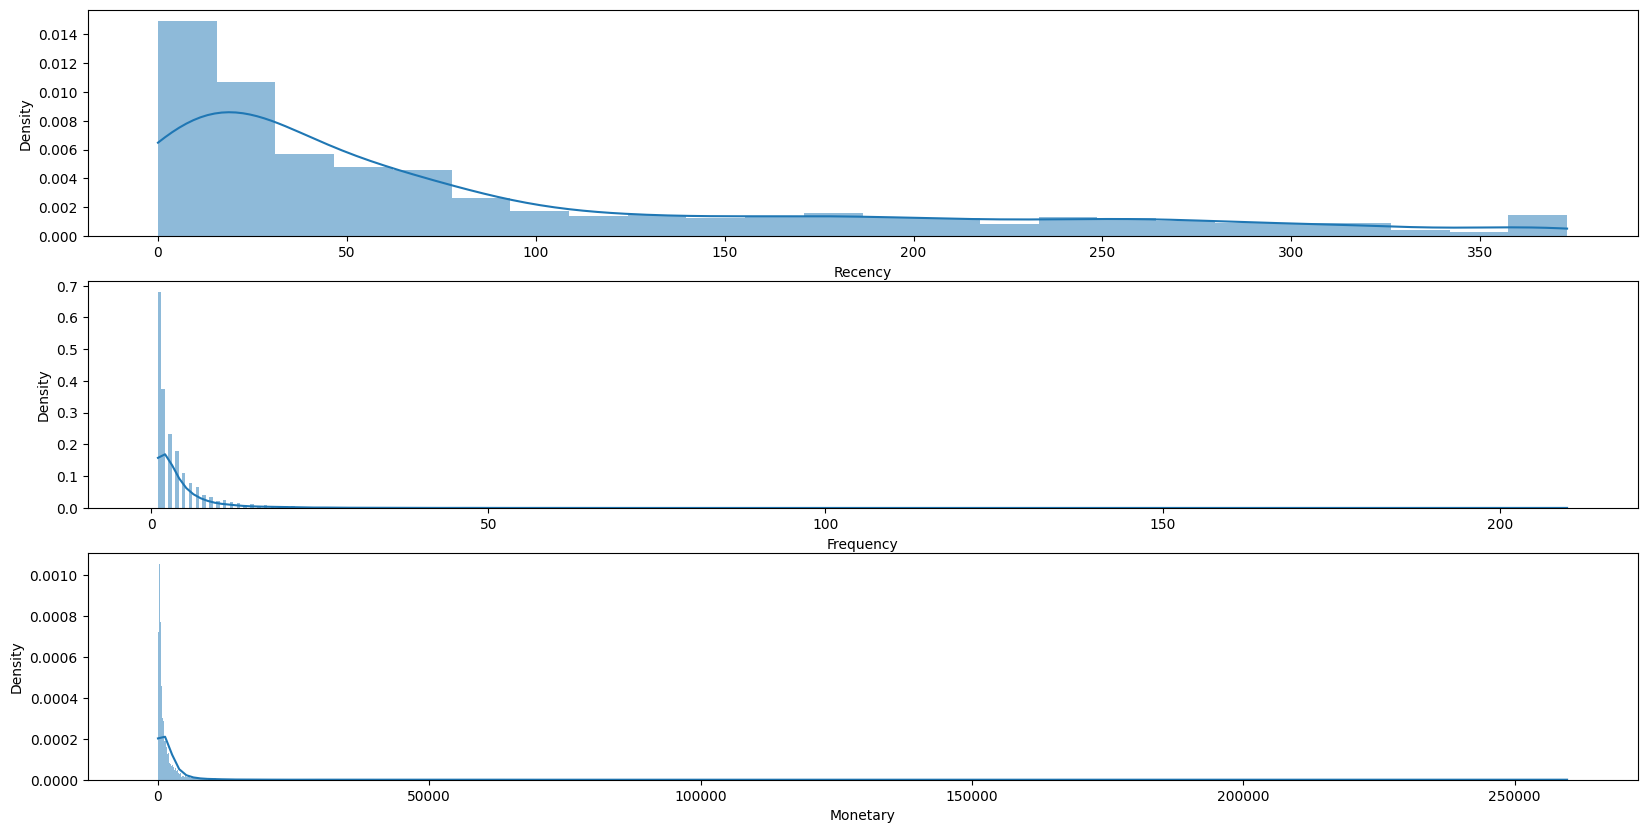

In [35]:
plt.figure(figsize = (20, 10))
plt.subplot(3, 1, 1)
sns.histplot(rfm['Recency'],kde=True, stat="density", linewidth=0)   # density: chuẩn hóa sao cho diện tích biểu đồ bằng 1
plt.subplot(3, 1, 2)
sns.histplot(rfm['Frequency'],kde=True, stat="density", linewidth=0)
plt.subplot(3, 1, 3)
sns.histplot(rfm['Monetary'],kde=True, stat="density", linewidth=0)
plt.show()

In [36]:
rfm.shape

(3920, 10)

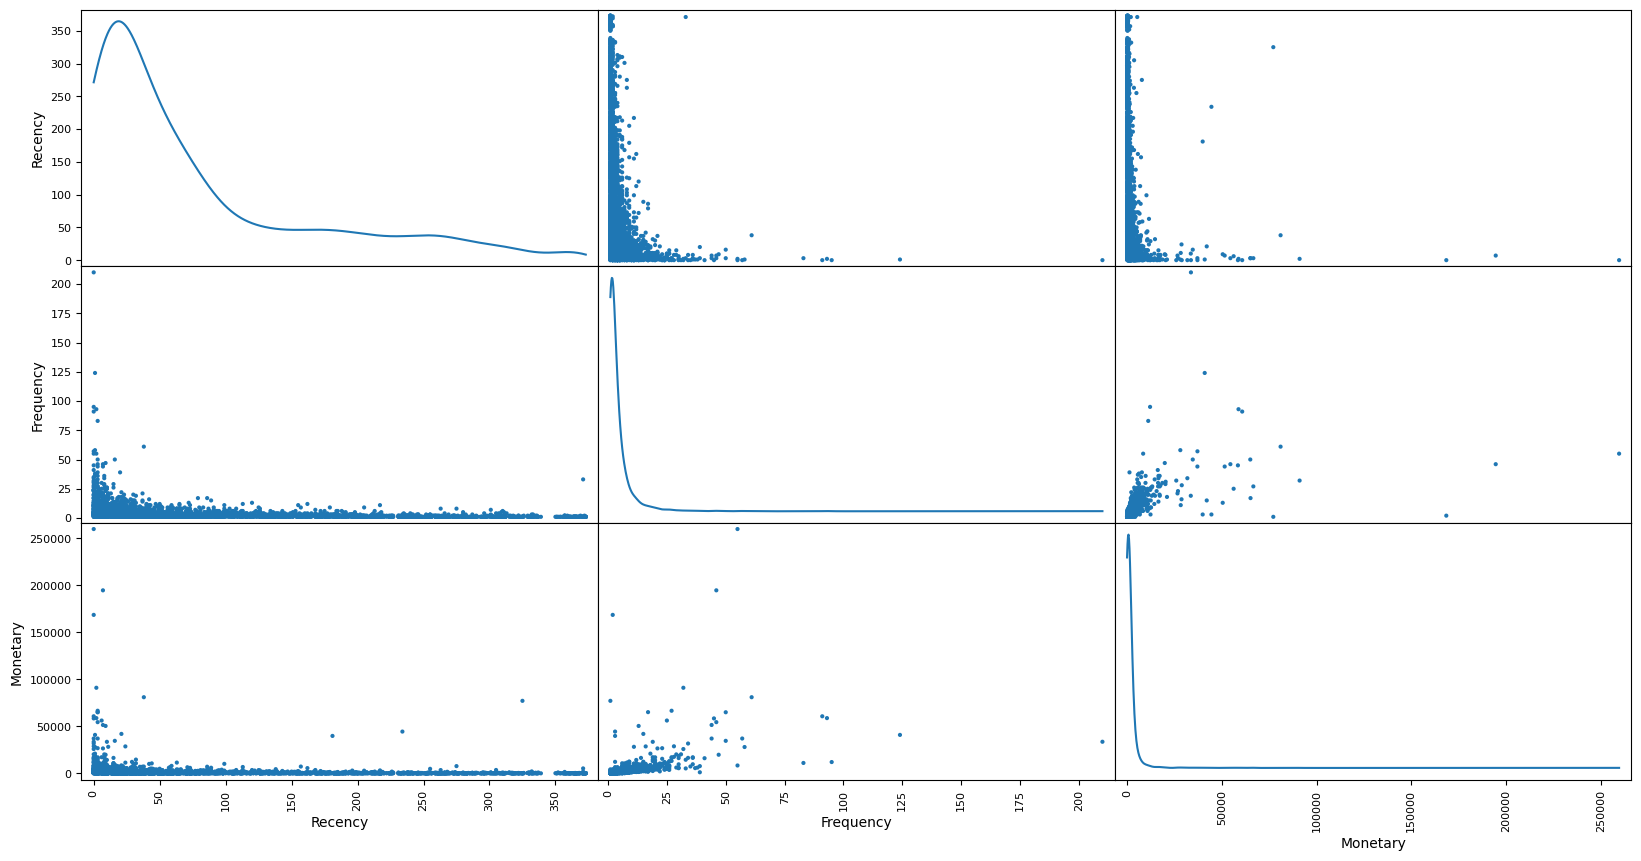

In [37]:
from pandas.plotting import scatter_matrix
scatter_matrix(rfm, alpha = 1, figsize = (20,10), diagonal = 'kde')
plt.show()

In [38]:
rfm_data = pd.concat([recency_df, frequency_df, monetary_df], axis = 1)
rfm_data.rename(columns = {'InvoiceDate' : 'Frequency', 'Revenue' : 'Monetary'}, inplace = True)
rfm_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,1,11,4196.01
12748.0,0,210,33719.73
12749.0,3,5,4090.88
12820.0,2,4,942.34


In [39]:
#log transformation
rfm_r_log = np.log(rfm_data['Recency']+ 0.1) #can't take log(0) and so add a small number
rfm_f_log = np.log(rfm_data['Frequency'])
rfm_m_log = np.log(rfm_data['Monetary'])
log_data = pd.DataFrame({'Monetary': rfm_m_log,'Recency': rfm_r_log,'Frequency': rfm_f_log})
log_data.head()

,Monetary,Recency,Frequency
CustomerID,,,
12346.0,11.253942,5.784133,0.000000
12747.0,8.341889,0.095310,2.397895
12748.0,10.425838,-2.302585,5.347108
12749.0,8.316515,1.131402,1.609438
12820.0,6.848366,0.741937,1.386294


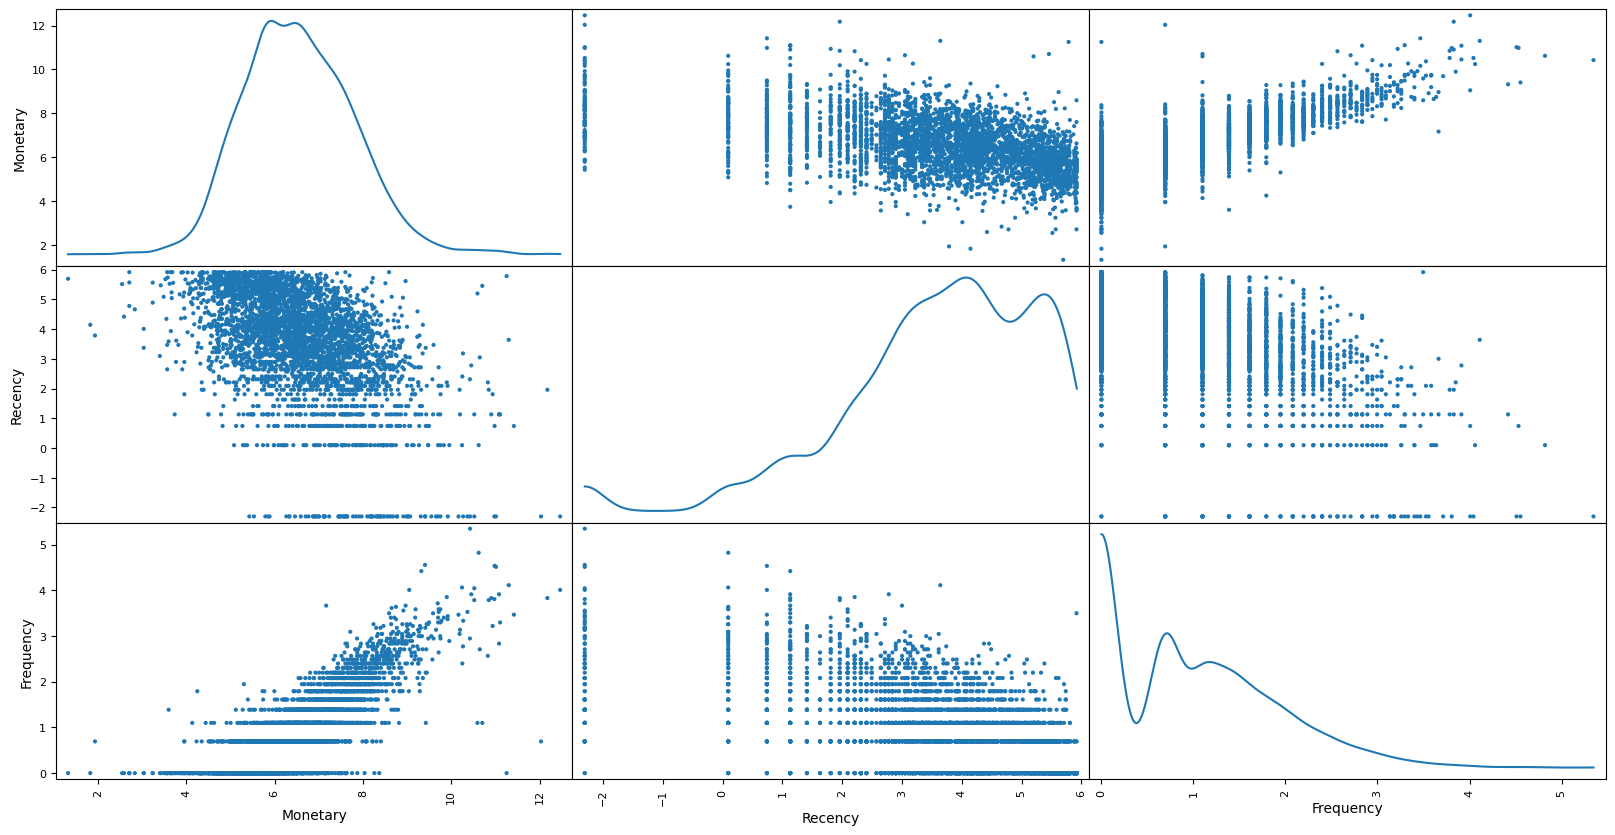

In [40]:
scatter_matrix(log_data, alpha = 1, figsize = (20,10), diagonal = 'kde')
plt.show()

            Recency  Frequency  Monetary
Recency    1.000000  -0.562420 -0.484375
Frequency -0.562420   1.000000  0.820164
Monetary  -0.484375   0.820164  1.000000


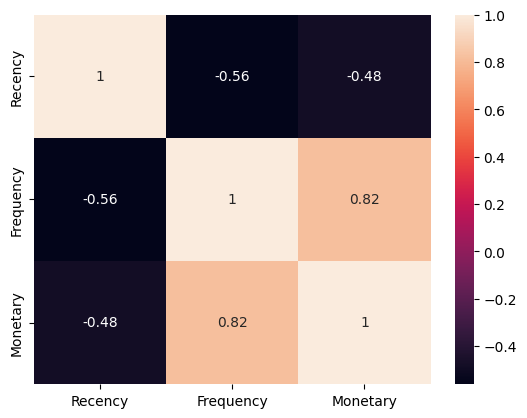

In [41]:
rfm_corr = log_data[['Recency', 'Frequency', 'Monetary']]
print(rfm_corr.corr())
sns.heatmap(rfm_corr.corr(), annot = True)
plt.show()

In [42]:
col = ['RecencyScore', 'FrequencyScore', 'MonetaryScore']
rfm[col] = rfm[col].astype(str)
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3920 entries, 0 to 3919
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      3920 non-null   object 
 1   Recency         3920 non-null   int64  
 2   Frequency       3920 non-null   int64  
 3   Monetary        3920 non-null   float64
 4   RecencyScore    3920 non-null   object 
 5   FrequencyScore  3920 non-null   object 
 6   MonetaryScore   3920 non-null   object 
 7   RFM             3920 non-null   object 
 8   Country         3920 non-null   object 
 9   Segment         3920 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 336.9+ KB


##### g. Visualization

                Segment  Count  Percent     Monetary Accumulation
0       Loyal Customers    729    18.60  1826227.121    24.988085
1           Hibernating    641    16.35   247446.762    28.373875
2             Champions    576    14.69   3541339.35    76.829672
3               At Risk    536    13.67   565841.151     84.57202
4   Potential Loyalists    451    11.51    472559.88     91.03801
5                  Lost    325     8.29     173416.8    93.410855
6        About to Sleep    316     8.06    137304.24    95.289576
7        Need Attention    157     4.01    130941.29    97.081232
8             Promising     89     2.27     23432.95    97.401863
9           Can't Loose     63     1.61    175680.76    99.805686
10        New Customers     37     0.94     14201.25        100.0

 
 --------------
 
 


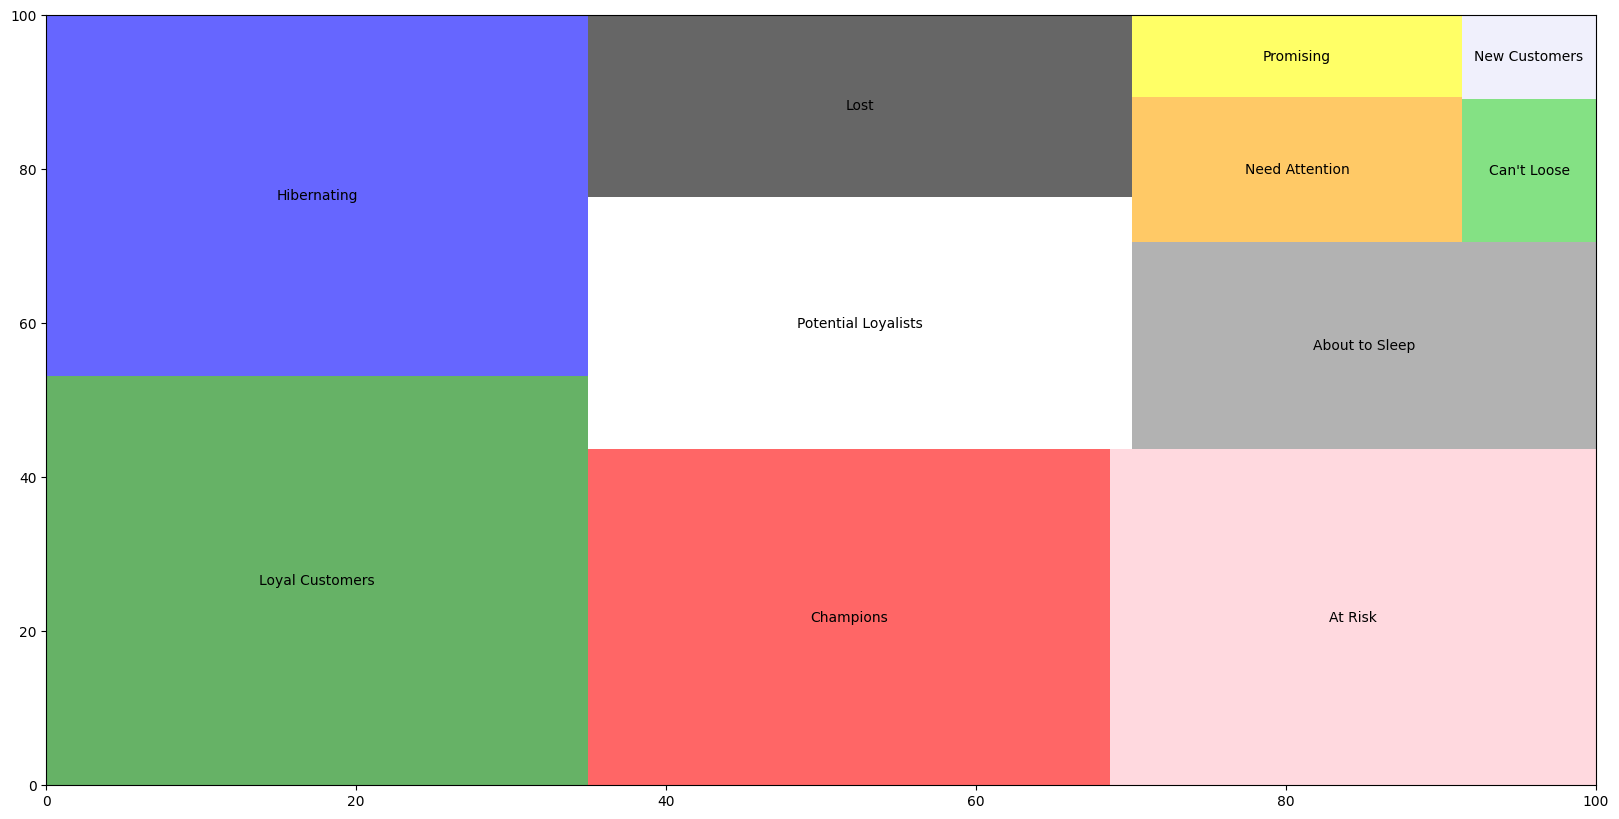


 
 --------------
 
 


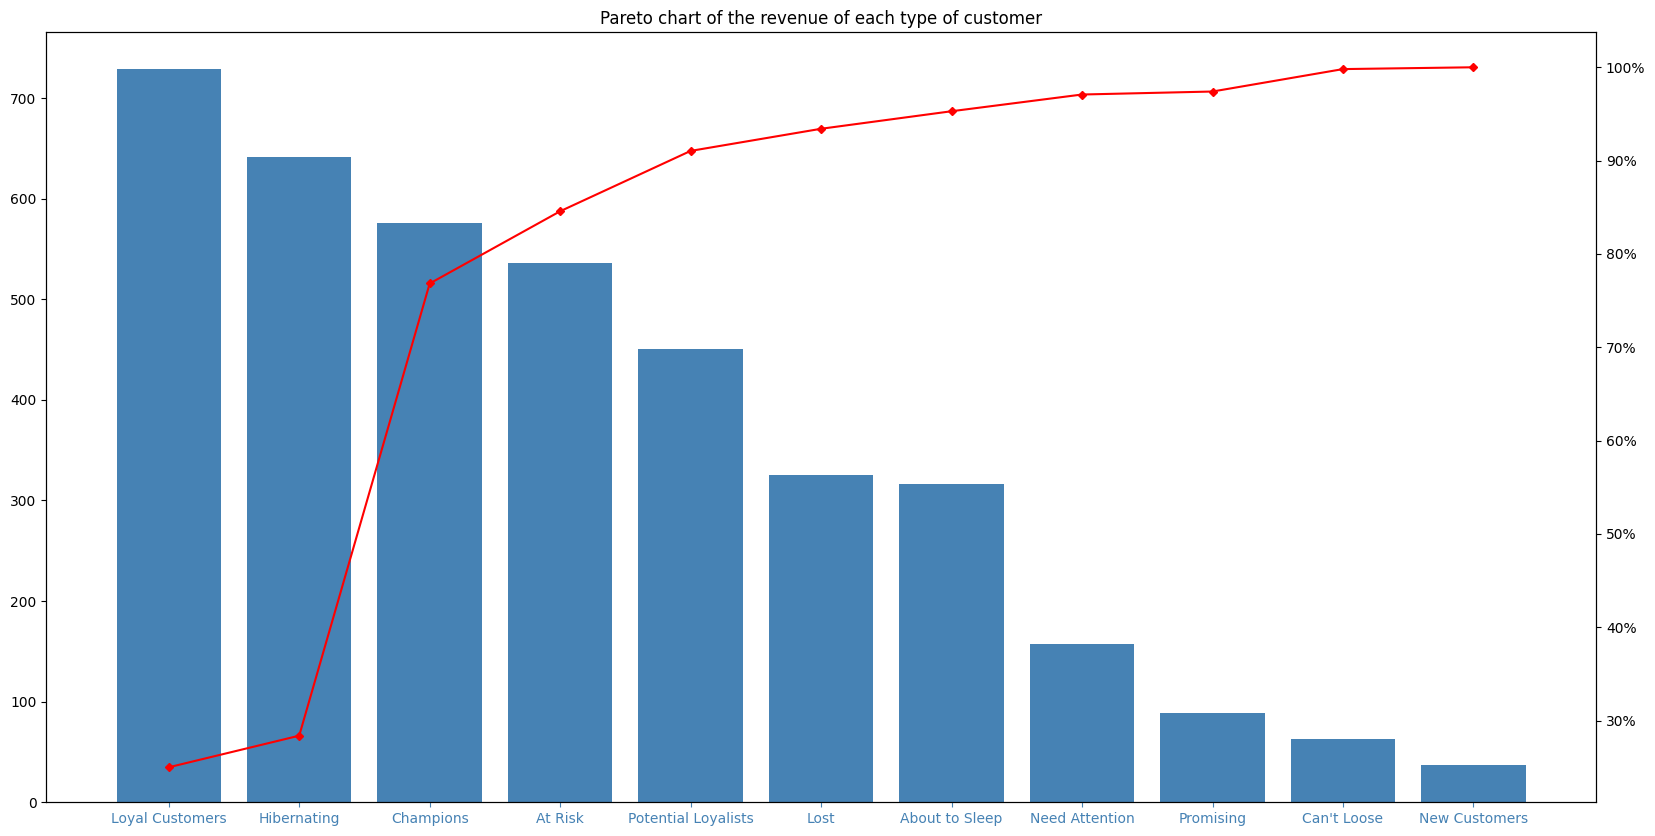


 
 --------------
 
 


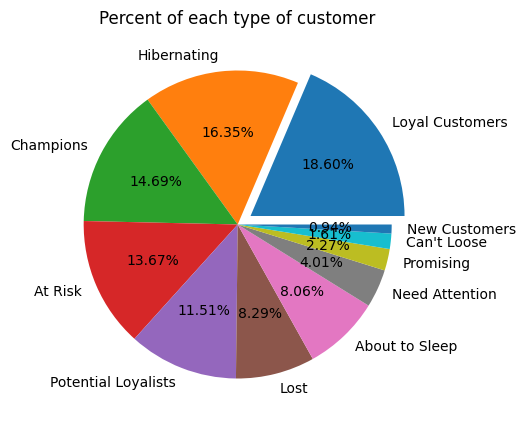

In [44]:
from matplotlib.ticker import PercentFormatter

rfm_segment = rfm['Segment'].value_counts().reset_index().rename(columns = {'index' :'Segment', 'Segment' : 'Count'})
rfm_segment['Percent'] = round(rfm['Segment'].value_counts(1).reset_index().rename(columns = {'index' :'Segment', 'Segment' : 'Count'}).iloc[:, 1] * 100, 2)

### 
a = rfm.groupby('Segment')['Monetary'].sum().reset_index()
dicted = dict(zip(a['Segment'], a['Monetary']))
b = rfm_segment['Segment']

rfm_segment['Monetary'] = ''
count = 0 
for i in b: 
    rfm_segment.loc[count, 'Monetary'] = dicted[i]
    count += 1 


rfm_segment['Accumulation'] = (rfm_segment['Monetary'].cumsum() / rfm_segment['Monetary'].sum()) * 100
print(rfm_segment)
print('\n \n --------------\n \n ')

# Treemap
import squarify
sizes = rfm_segment['Count']
label = rfm_segment['Segment']

fig, ax = plt.subplots(figsize = (20, 10))
color = ['green', 'blue', 'red', 'pink', 'white', 'black', 'grey', 'orange', 'yellow', 'limegreen', 'lavender']
squarify.plot(sizes=sizes, label=label, alpha=0.6, color = color )
plt.show()
print('\n \n --------------\n \n ')

color1 = 'steelblue'
color2 = 'red'
line_size = 4 
label = rfm_segment['Segment'].values


# Pareto
fig, ax = plt.subplots(figsize = (20, 10))
ax.bar(label, rfm_segment['Count'], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(label, rfm_segment['Accumulation'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter()) ## định dạng trục y dưới dạng phần trăm

ax.tick_params(axis='x', colors=color1)
ax2.tick_params(axis='x', colors=color2)

plt.title('Pareto chart of the revenue of each type of customer')
plt.show()

print('\n \n --------------\n \n ')
# Percent
fig, ax = plt.subplots(figsize = (6, 5))
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
values = rfm_segment['Percent']
labels = rfm_segment['Segment']
plt.pie(values,labels = labels,autopct='%1.2f%%',explode=explode)
fig.set_facecolor('white')
plt.title('Percent of each type of customer')
plt.show()

#####    Applying 80-20 rule

In [45]:
pareto_80 = round(rfm['Monetary'].sum() * 0.8, 2)
print('80% doanh thu của tập dữ liệu là', pareto_80)
customer_rank = rfm 
customer_rank['Rank'] = customer_rank['Monetary'].rank(ascending = False)
pareto_20 = round(rfm.shape[0] * 0.2)
print('20% số lượng khách hàng là', pareto_20)
revenue_by_20 = round(customer_rank[customer_rank['Rank'] <= pareto_20]['Monetary'].sum(),2)
print('Tổng doanh thu của 20% khách hàng là', revenue_by_20)
print('Tổng doanh thu của 20% khách hàng chiếm bao nhiêu % trên tổng doanh thu', round(revenue_by_20 * 100 / (pareto_80 / 0.8), 2), '%')
customer_rank.sort_values('Rank', ascending = True).head()

80% doanh thu của tập dữ liệu là 5846713.24
20% số lượng khách hàng là 784
Tổng doanh thu của 20% khách hàng là 5357216.87
Tổng doanh thu của 20% khách hàng chiếm bao nhiêu % trên tổng doanh thu 73.3 %


,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM,Country,Segment,Rank
3783,18102.0,0,55,259657.30,5,5,5,555,United Kingdom,Champions,1.0
3314,17450.0,7,46,194550.79,5,5,5,555,United Kingdom,Champions,2.0
2598,16446.0,0,2,168472.50,5,3,5,535,United Kingdom,Potential Loyalists,3.0
3356,17511.0,2,32,91062.38,5,5,5,555,United Kingdom,Champions,4.0
2294,16029.0,38,61,81024.84,3,5,5,355,United Kingdom,Loyal Customers,5.0


                Segment  Avg Recency of each Segment
3             Champions                            4
8         New Customers                            6
9   Potential Loyalists                           16
10            Promising                           22
6       Loyal Customers                           32
7        Need Attention                           50
0        About to Sleep                           52
2           Can't Loose                          129
1               At Risk                          152
4           Hibernating                          183
5                  Lost                          276

 
 --------------
 
 


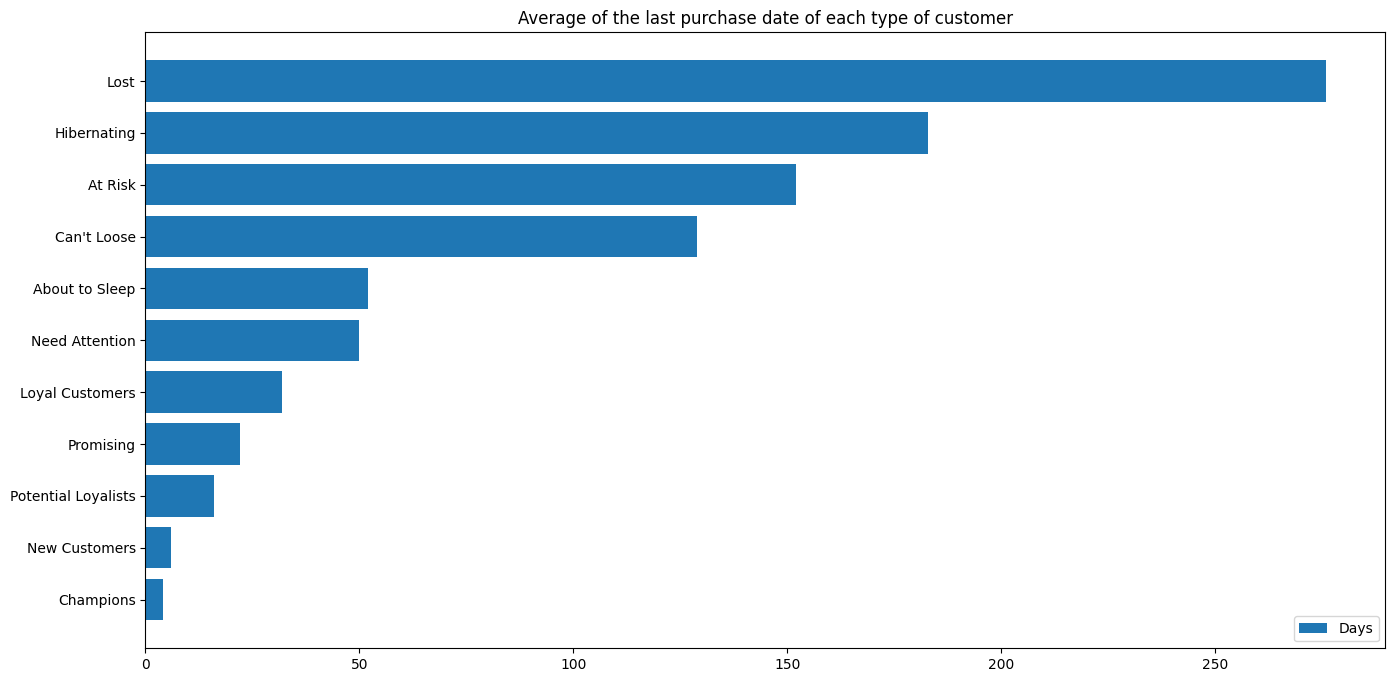

In [46]:
rfm_avg_R = rfm.groupby('Segment')['Recency'].mean().astype(int).reset_index().\
            rename(columns = {'Recency' : 'Avg Recency of each Segment'}).sort_values('Avg Recency of each Segment')
print(rfm_avg_R)
print('\n \n --------------\n \n ')
fig, ax = plt.subplots(figsize = (16, 8))
plt.barh(rfm_avg_R['Segment'], rfm_avg_R['Avg Recency of each Segment'])
plt.title('Average of the last purchase date of each type of customer')
plt.legend(['Days'])
plt.show()

                Segment  Avg Monetary of each Segment
10            Promising                           263
8         New Customers                           383
4           Hibernating                           386
0        About to Sleep                           434
5                  Lost                           533
7        Need Attention                           834
9   Potential Loyalists                          1047
1               At Risk                          1055
6       Loyal Customers                          2505
2           Can't Loose                          2788
3             Champions                          6148

 
 --------------
 
 


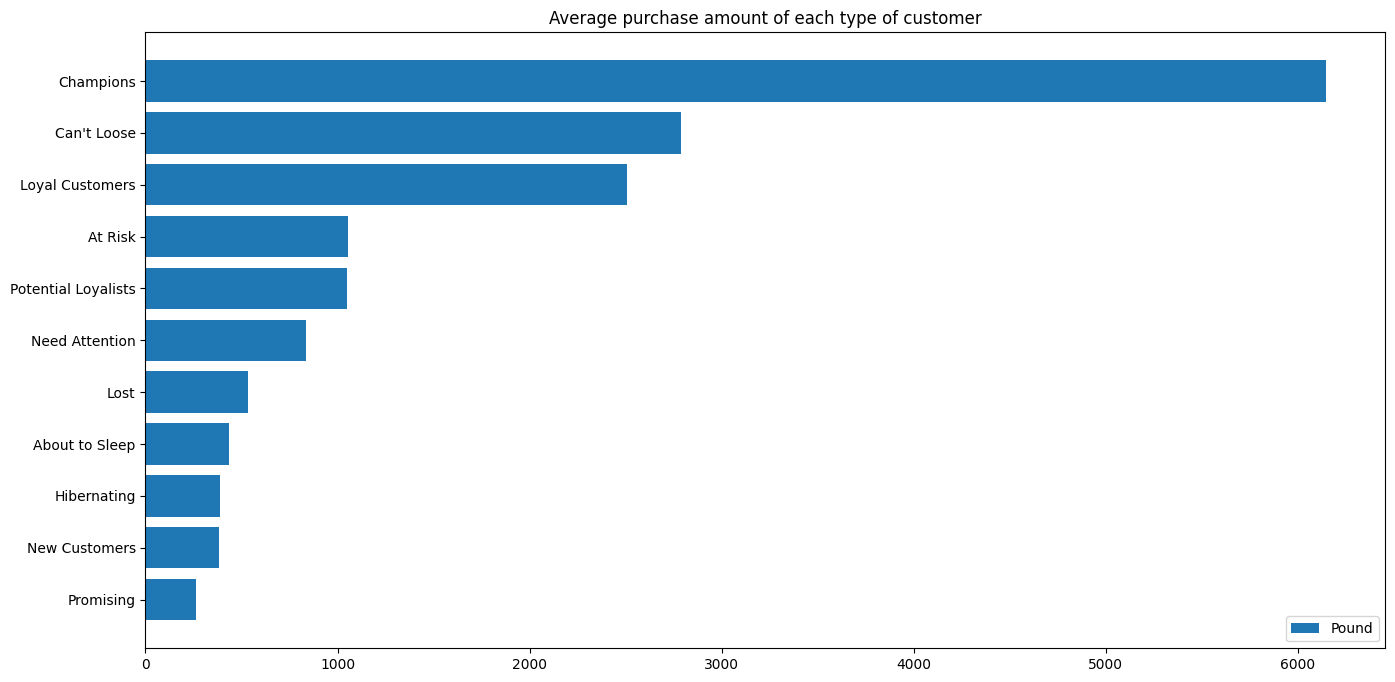

In [47]:
rfm_avg_M = rfm.groupby('Segment')['Monetary'].mean().astype(int).reset_index().\
            rename(columns = {'Monetary' : 'Avg Monetary of each Segment'}).sort_values('Avg Monetary of each Segment')
print(rfm_avg_M)
print('\n \n --------------\n \n ')
fig, ax = plt.subplots(figsize = (16, 8))
plt.barh(rfm_avg_M['Segment'], rfm_avg_M['Avg Monetary of each Segment'])
plt.title('Average purchase amount of each type of customer')
plt.legend(['Pound'])
plt.show()

                Segment  Avg Frequency of each Segment
0        About to Sleep                              1
4           Hibernating                              1
5                  Lost                              1
8         New Customers                              1
10            Promising                              1
1               At Risk                              2
7        Need Attention                              2
9   Potential Loyalists                              2
6       Loyal Customers                              6
2           Can't Loose                              8
3             Champions                             12

 
 --------------
 
 


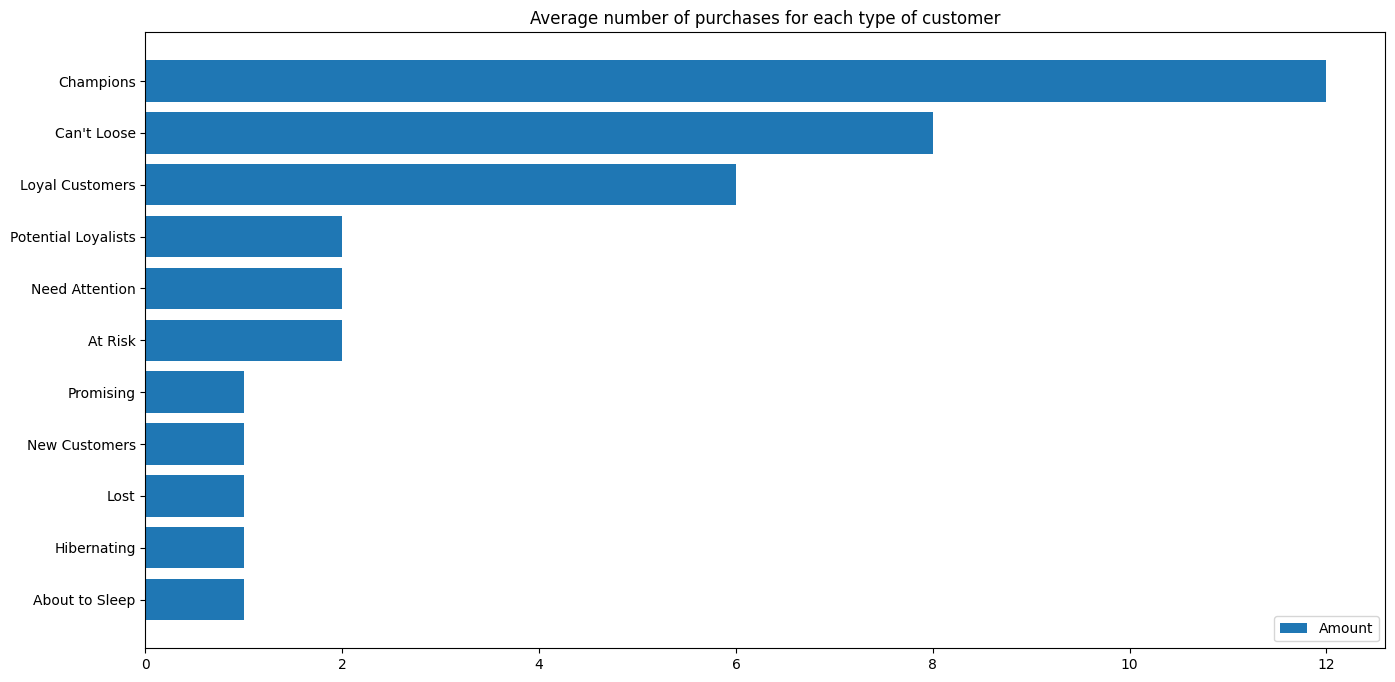

In [48]:
rfm_avg_F = rfm.groupby('Segment')['Frequency'].mean().astype(int).reset_index().\
            rename(columns = {'Frequency' : 'Avg Frequency of each Segment'}).sort_values('Avg Frequency of each Segment')
print(rfm_avg_F)
print('\n \n --------------\n \n ')
fig, ax = plt.subplots(figsize = (16, 8))
plt.barh(rfm_avg_F['Segment'], rfm_avg_F['Avg Frequency of each Segment'])
plt.title('Average number of purchases for each type of customer')
plt.legend(['Amount'])
plt.show()

#### Cohort by time

In [49]:
cohort_data = retail_df.loc[retail_df['CustomerID'] != 'No CustomerID']
cohort_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 495477
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   level_0      354321 non-null  int64         
 1   index        354321 non-null  int64         
 2   InvoiceNo    354321 non-null  object        
 3   StockCode    354321 non-null  object        
 4   Description  354321 non-null  object        
 5   Quantity     354321 non-null  int64         
 6   InvoiceDate  354321 non-null  datetime64[ns]
 7   UnitPrice    354321 non-null  float64       
 8   CustomerID   354321 non-null  object        
 9   Country      354321 non-null  object        
 10  Revenue      354321 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 32.4+ MB


In [50]:
cohort_data[cohort_data['CustomerID'] == 'No CustomerID']

,level_0,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue


In [51]:
# quy đổi tính thành đầu tháng và lấy min
def get_month(x): 
    return dt.datetime(x.year, x.month, 1)
cohort_data['InvoiceMonth'] = cohort_data['InvoiceDate'].apply(get_month)
grouping = cohort_data.groupby('CustomerID')['InvoiceMonth']
cohort_data['CohortMonth'] = grouping.transform('min')

# lấy thành tố trong datetime
def get_date_int(df, column): 
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day 

invoice_year, invoice_month, invoice_day = get_date_int(cohort_data, 'InvoiceMonth')
cohort_year, cohort_month, cohort_day = get_date_int(cohort_data, 'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
cohort_data['CohortIndex'] = years_diff * 12 + months_diff
cohort_data.sample(5)

,level_0,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,CohortMonth,CohortIndex
176787,176787,191634,553383,82582,AREA PATROLLED METAL SIGN,12,2011-05-16 15:48:00,2.10,18230.0,United Kingdom,25.20,2011-05-01,2011-02-01,3
296775,296775,324974,565426,21088,SET/6 FRUIT SALAD PAPER CUPS,3,2011-09-04 12:41:00,0.19,12851.0,United Kingdom,0.57,2011-09-01,2011-09-01,0
244508,244508,266235,560248,23309,SET OF 60 I LOVE LONDON CAKE CASES,12,2011-07-17 12:24:00,0.55,16255.0,United Kingdom,6.60,2011-07-01,2010-12-01,7
293852,293852,321726,565198,22728,ALARM CLOCK BAKELIKE PINK,4,2011-09-01 16:18:00,3.75,16729.0,United Kingdom,15.00,2011-09-01,2011-04-01,5
345206,345206,378149,569632,90129E,PURPLE GLASS TASSLE BAG CHARM,6,2011-10-05 11:57:00,2.95,13808.0,United Kingdom,17.70,2011-10-01,2011-09-01,1


In [52]:
cohort_counts = pd.crosstab(cohort_data['CohortMonth'], cohort_data['CohortIndex'], values = cohort_data['CustomerID'], aggfunc = 'nunique')
cohort_counts

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,815.0,289.0,263.0,304.0,293.0,323.0,291.0,278.0,289.0,325.0,299.0,405.0,218.0
2011-01-01,358.0,76.0,93.0,84.0,119.0,99.0,90.0,87.0,108.0,117.0,127.0,43.0,NaN
2011-02-01,340.0,64.0,66.0,97.0,98.0,86.0,87.0,96.0,90.0,104.0,25.0,NaN,NaN
2011-03-01,419.0,64.0,109.0,83.0,94.0,69.0,111.0,96.0,119.0,38.0,NaN,NaN,NaN
2011-04-01,277.0,58.0,56.0,60.0,56.0,61.0,61.0,73.0,20.0,NaN,NaN,NaN,NaN
2011-05-01,256.0,48.0,44.0,44.0,53.0,58.0,68.0,23.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,214.0,38.0,31.0,51.0,51.0,69.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,169.0,30.0,33.0,39.0,47.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,141.0,32.0,32.0,34.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


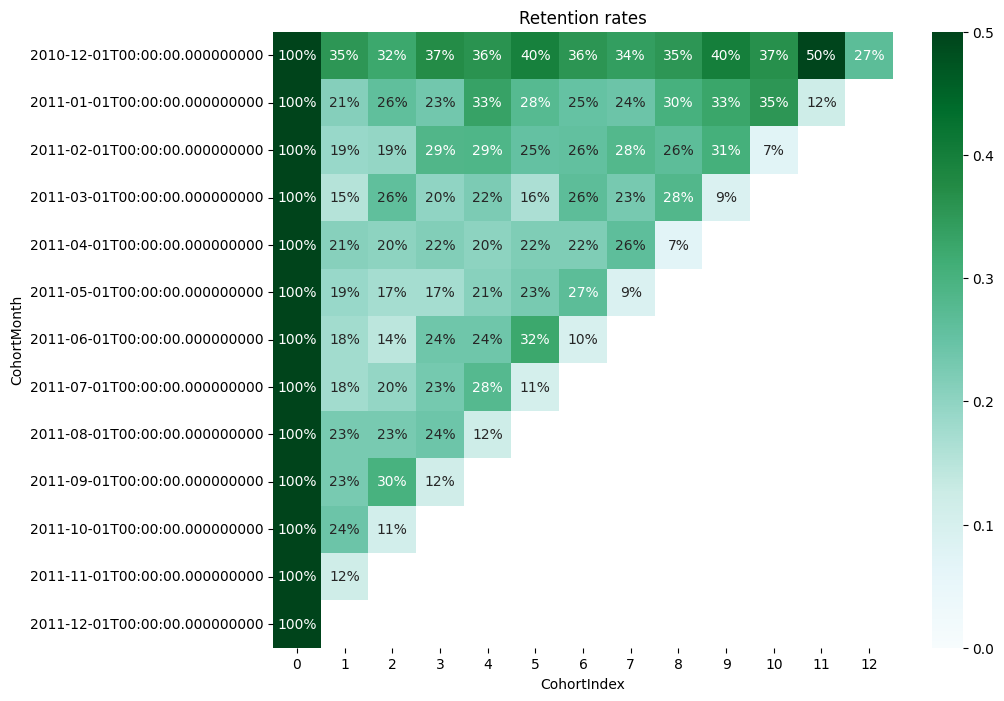

In [53]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Check the retention table
retention.round(3) * 100
#  heatmap
plt.figure(figsize=(10, 8))
plt.title('Retention rates')
sns.heatmap(data = retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap = 'BuGn')
plt.show()

# Customer Lifetime Value

In [54]:
today_date = dt.datetime(2011, 12, 11, 0, 0, 0) # vì ngày cuối cùng của dataset là 09/12/2011 nên t sẽ lựa thời điểm kết thúc ngày 10/12/2011 để tính vòng đời KH
df = retail_df[retail_df['CustomerID'] != 'No CustomerID']
cltv_df = df.groupby('CustomerID').agg({'InvoiceDate': [lambda invoice_date: (invoice_date.max() - invoice_date.min()).days,
                                                        lambda invoice_date: (today_date - invoice_date.min()).days], 
                                        'InvoiceNo': lambda invoice: invoice.nunique(),
                                        'Revenue': lambda total_price: total_price.sum()})

cltv_df.columns = cltv_df.columns.droplevel(0)
cltv_df.columns = ['Recency', 'T', 'Frequency', 'Monetary']
cltv_df.head()

,Recency,T,Frequency,Monetary
CustomerID,,,,
12346.0,0,326,1,77183.60
12747.0,366,370,11,4196.01
12748.0,372,374,209,33719.73
12749.0,209,214,5,4090.88
12820.0,323,327,4,942.34


In [55]:
# giá trị đơn hàng trung bình 
cltv_df['Monetary'] = cltv_df['Monetary'] / cltv_df['Frequency']
# recency & tenure theo tuần
cltv_df['Recency'] = cltv_df['Recency'] / 7 
cltv_df['T'] = cltv_df['T'] / 7 

In [56]:
cltv_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3920 entries, 12346.0 to 18287.0
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    3920 non-null   float64
 1   T          3920 non-null   float64
 2   Frequency  3920 non-null   int64  
 3   Monetary   3920 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 153.1+ KB


In [57]:
from lifetimes import BetaGeoFitter, ModifiedBetaGeoFitter
bgf = ModifiedBetaGeoFitter(penalizer_coef=0.001) #avoid overfitting

bgf.fit(cltv_df['Frequency'],
        cltv_df['Recency'],
        cltv_df['T'])

<lifetimes.ModifiedBetaGeoFitter: fitted with 3920 subjects, a: 0.49, alpha: 6.12, b: 3.17, r: 1.73>

In [58]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,1.730405,0.079760,1.574074,1.886735
alpha,6.118754,0.440949,5.254494,6.983014
a,0.489795,0.026062,0.438713,0.540876
b,3.173333,0.173913,2.832464,3.514202


In [59]:
# Top 10 Expected Number of Transaction (1 Week)
bgf.conditional_expected_number_of_purchases_up_to_time(1,
                                                        cltv_df['Frequency'],
                                                        cltv_df['Recency'],
                                                        cltv_df['T']).sort_values(ascending=False).head(10)

CustomerID
12748.0    3.502292
17841.0    2.083058
13089.0    1.646267
14606.0    1.571856
15311.0    1.541017
12971.0    1.447937
13408.0    1.053463
18102.0    1.036715
13798.0    0.972624
14527.0    0.944279
dtype: float64

In [60]:
# Top 10 Expected Number of Transaction (1 Month)
bgf.conditional_expected_number_of_purchases_up_to_time(4,
                                                        cltv_df['Frequency'],
                                                        cltv_df['Recency'],
                                                        cltv_df['T']).sort_values(ascending=False).head(10)

CustomerID
12748.0    13.844001
17841.0     8.234571
13089.0     6.507468
14606.0     6.214071
15311.0     6.092185
12971.0     5.724125
13408.0     4.165137
18102.0     4.098286
13798.0     3.845521
14527.0     3.733191
dtype: float64

In [61]:
# Total Expected Number of Transaction (1 Month)
bgf.predict(4,
            cltv_df['Frequency'],
            cltv_df['Recency'],
            cltv_df['T']).sum()

1858.9383077336693

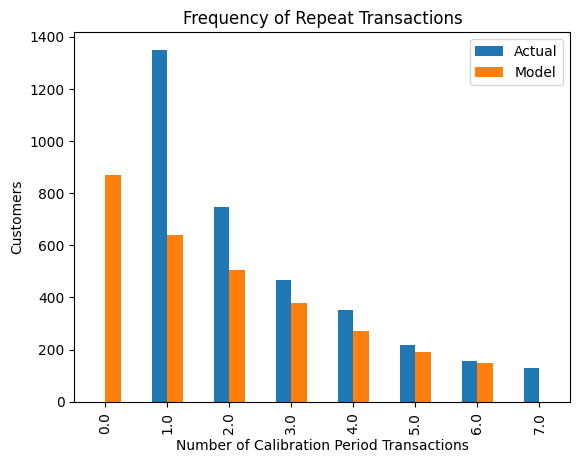

In [62]:
# Frequency of Repeat Transactions
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)
plt.show()

Gamma - Gamma Submodel

The Gamma-Gamma Model can predict the most likely value per transaction in the future.

The properties of Gamma-Gamma model are:

Monetary value of users’ transactions is random around their mean transaction value.
Mean transaction value varies across users but doesn’t vary for an individual user over time.
Mean transaction values is Gamma distributed across customers.

In [63]:
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef=0.01)

ggf.fit(cltv_df['Frequency'], cltv_df['Monetary'])

<lifetimes.GammaGammaFitter: fitted with 3920 subjects, p: 3.84, q: 0.35, v: 3.72>

In [64]:
# Top 10 Expected Average Profit
ggf.conditional_expected_average_profit(cltv_df['Frequency'],
                                        cltv_df['Monetary']).sort_values(ascending=False).head(10)

CustomerID
12346.0    92914.068074
16446.0    92026.356467
15749.0    15733.709084
15098.0    14102.403499
18251.0     5198.313456
15195.0     4652.149001
16000.0     4379.570689
18102.0     4339.926698
17450.0     4245.065992
14088.0     3935.512324
dtype: float64

In [65]:
# CLTV
cltv = ggf.customer_lifetime_value(bgf,cltv_df['Frequency'],
                                   cltv_df['Recency'],cltv_df['T'],
                                   cltv_df['Monetary'],time=6,
                                   freq="W",discount_rate=0.01)

In [66]:
# Top 10 CLTV (6 Months)
cltv = cltv.reset_index()
cltv.sort_values(by="clv", ascending=False).head(10)

,CustomerID,clv
2598,16446.0,199252.830651
3783,18102.0,103875.204891
3314,17450.0,77224.872516
902,14096.0,68816.598710
2270,16000.0,48727.901400
3356,17511.0,36728.012680
1682,15195.0,30043.768047
2766,16684.0,27858.533894
620,13694.0,25674.392877
897,14088.0,24292.839083


In [67]:
# Segmentation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(cltv[["clv"]])
cltv["scaled_clv"] = scaler.transform(cltv[["clv"]])

cltv["segment"] = pd.qcut(cltv["scaled_clv"], 4, labels=["D", "C", "B", "A"])
cltv.head()

,CustomerID,clv,scaled_clv,segment
0,12346.0,2631.977861,0.013209,A
1,12747.0,1867.472757,0.009372,A
2,12748.0,13050.739643,0.065498,A
3,12749.0,3266.740813,0.016395,A
4,12820.0,579.531506,0.002909,C


In [68]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
fig = make_subplots(rows=2,
                    cols=2,
                    subplot_titles=("A", "B",'C','D'))

fig.add_trace(go.Box(y =cltv[cltv['segment']=='A']['clv'],showlegend=False,
                     name = 'A',
                     marker_color='#1760E1'),row=1,col=1)
fig.add_trace(go.Box(y =cltv[cltv['segment']=='B']['clv'],showlegend=False,
                     name = 'B',
                     marker_color='#1760E1'),row=1,col=2)
fig.add_trace(go.Box(y =cltv[cltv['segment']=='C']['clv'],showlegend=False,
                     name = 'C',
                     marker_color='#1760E1'),row=2,col=1)
fig.add_trace(go.Box(y =cltv[cltv['segment']=='D']['clv'],showlegend=False,
                     name = 'D',
                     marker_color='#1760E1'),row=2,col=2)

fig.update_layout(title={'text': "CLTV by SEGMENTS",
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly')      
iplot(fig)

In [69]:
data = go.Bar(x = cltv.groupby('segment').agg({'clv':'mean'}).reset_index()['segment'],
              y = cltv.groupby('segment').agg({'clv':'mean'}).reset_index()['clv'],
              text = round(cltv.groupby('segment').agg({'clv':'mean'}).reset_index()['clv'],3),
              textposition= 'auto',
              marker = dict(color = 'darkorange'))

layout = go.Layout(title={'text': "Average CLV by Segments",
                          'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   xaxis = dict(title='Segment'),
                   yaxis =dict(title='CLV'),
                   template = 'plotly_white')

fig=go.Figure(data=data, layout=layout)
fig.update_yaxes(range=[0,5100])
iplot(fig)

# Kmean - Clustering

In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
matrix = log_data.values # convert DF to array
for n_clusters in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.42171555613192857
For n_clusters = 3 The average silhouette_score is : 0.3531990207285831
For n_clusters = 4 The average silhouette_score is : 0.3356464647625261
For n_clusters = 5 The average silhouette_score is : 0.3387951708697664
For n_clusters = 6 The average silhouette_score is : 0.3258095340642416
For n_clusters = 7 The average silhouette_score is : 0.322587594967436
For n_clusters = 8 The average silhouette_score is : 0.32103830786480103
For n_clusters = 9 The average silhouette_score is : 0.3219630947177373


--> n_cluster = 2 được đánh giá cao nhất nên chúng ta sẽ phân cụm thành 2 loại

In [71]:
n_clusters = 2
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(matrix)
clusters_customers = kmeans.predict(matrix)
silhouette_avg = silhouette_score(matrix, clusters_customers)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.422


### Visualize Cluster

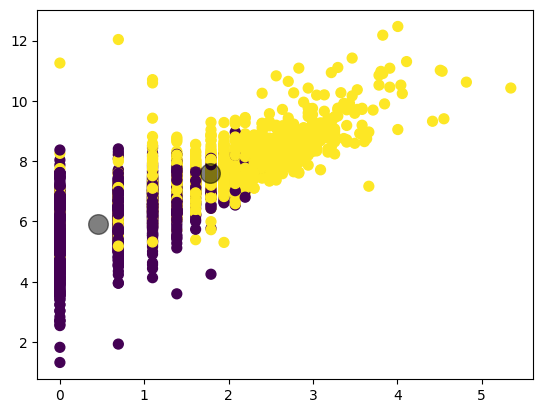

In [72]:
#create a scatter plot
#chỉ phân cụm theo F và M vì chỉ có 2 thành tố này mới có sự tương quan thuận mạnh

plt.scatter(matrix[:, 2], matrix[:, 0], c=clusters_customers, s=50, cmap='viridis') 
#select cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 0], c='black', s=200, alpha=0.5)
plt.show()

In [73]:
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns = ['NumberCustomers']).T

,0,1
NumberCustomers,2456,1464


### GMM

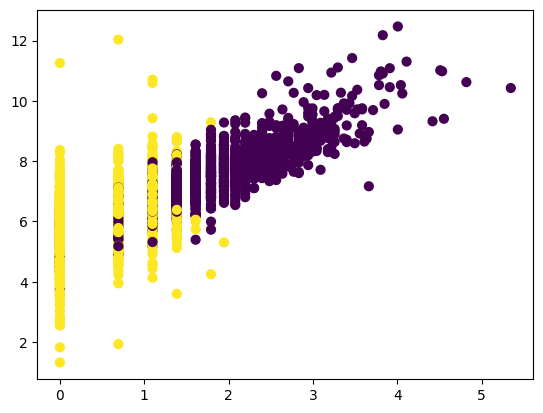

In [74]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2).fit(matrix)
labels = gmm.predict(matrix)
plt.scatter(matrix[:, 2], matrix[:, 0], c=labels, s=40, cmap='viridis')
plt.show()